# Payment Fraud Assignment - Tripti Bhati 


## OUTLINE AND SUMMARY 

*   First step was to clean the data and identify any missing or wrong values in the data
* Also since the data size large for my current system, I tried to reduce the file size by changing the datatypes where ever possible
*   After Data Cleaning I did Exploratory Data Analysis to see any pattern in the fraud transaction. 
* Next step was to identify features to be used in the model based on the observations of data exploration 
*   Detecting Frauds in Online Transactions using Anamoly Detection Techniques Such as Over Sampling and Under-Sampling as the ratio of Frauds is less than 0.00005 thus, simply applying Classification Algorithm may result in Overfitting
*   So after using Logistic Regression, Naive Bayes and XG-Boost models from scikit learn, XG-Boost gives the best result with precision score of 0.99



In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("Fraud.csv")

#  DATA PREPROCESSING 
### collection of basic information about our dataset

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As we have seen type of each column of the data needs more storage and some column have null value and firstly we will deal with null value and then try to reduce space complexity of dataframe operations.


In [ ]:
df[df.isnull().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


Here we have one row that contains all of null values of dataframe. It contains more null data than not null so we can drop this row.


In [ ]:
df=df.dropna()

In [ ]:
#df=df.dropna(subset=['nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud'], how= "all")

In [ ]:
df.shape

(6362620, 11)

so the row containing all of null values of df is dropped and so our dataframe has no null values. 
It is not good practice to drop entire row if it contains less number of null values.In this scenerio we can use fillna() to replace null values with the appropriate value.

Let's check for null value once again

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Checking Datatype

In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Since isFraud and isFlaggedFraud can have only two values either 0 or 1. so we can change their datatype to category to reduce memory usage 

In [ ]:
df['isFraud'].unique()

array([0, 1])

In [ ]:
df['isFraud'] = df['isFraud'].astype("category")
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype("category")

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Since "type" column also contains five categorical value so we can change the data type of "type" column

In [ ]:
df["type"]=df["type"].astype("category")

In [ ]:
df["step"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

The range of value for step column is 1 to 522 so we can allote int16 for this column

In [ ]:
df["step"]=df["step"].astype("int16")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int16   
 1   type            category
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         category
 10  isFlaggedFraud  category
dtypes: category(3), float64(5), int16(1), object(2)
memory usage: 370.1+ MB


Now after changing the datatypes, it is evident that we have decreased memory usage from 510.6+ MB to 400.3+ MB.

# Exploratory Analysis and Visualization

In [ ]:
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

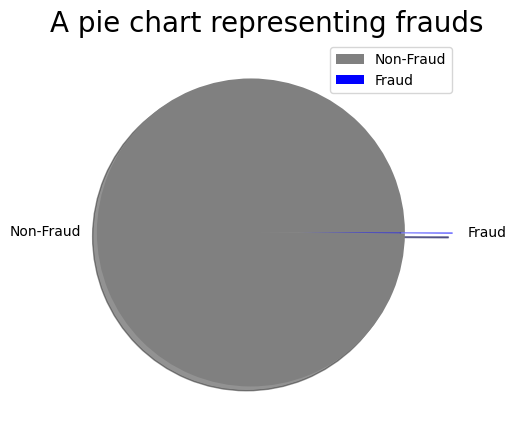

In [ ]:
labels = ['Non-Fraud', 'Fraud']
colors = ['grey', 'blue']
size = [6077798, 5797]
explode = [0.1, 0.21]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing frauds',fontsize = 20)
plt.legend()
plt.show()
     

     


In [ ]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

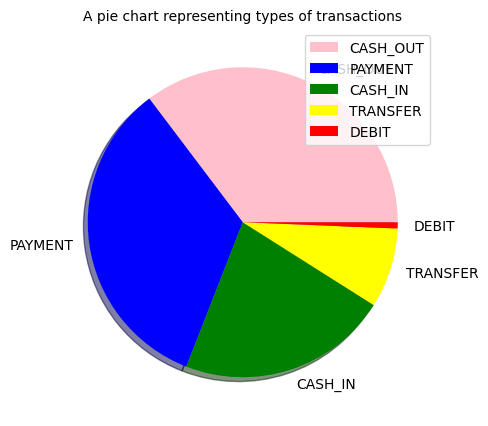

In [ ]:
labels = ['CASH_OUT', 'PAYMENT','CASH_IN','TRANSFER','DEBIT']
colors = ['pink', 'blue','green','yellow','red']
size = [2147626, 2054295,1335762,506764,39148]
plt.rcParams['figure.figsize'] = (5, 10)
plt.pie(size, labels = labels, colors = colors,  shadow = True)
plt.axis('off')
plt.title('A pie chart representing types of transactions', fontsize = 10)
plt.legend()
plt.show()

<Axes: xlabel='step', ylabel='count'>

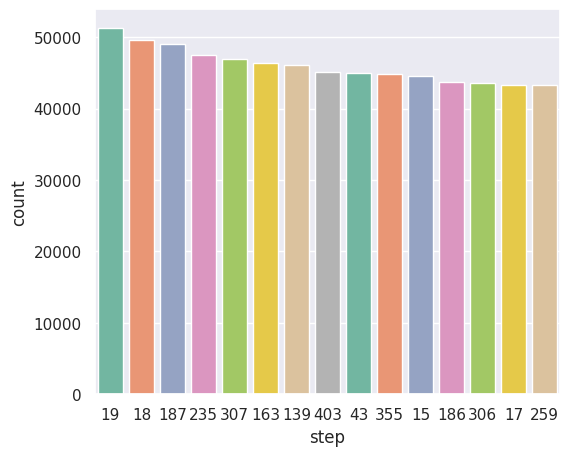

In [ ]:
plt.figure(figsize=(6,5))
sns.set(style="darkgrid")
sns.countplot(x="step", data= df, palette="Set2", order=df['step'].value_counts().index[0:15])

<ipython-input-26-d087b16020f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'],bins=100)


<Axes: xlabel='step', ylabel='Density'>

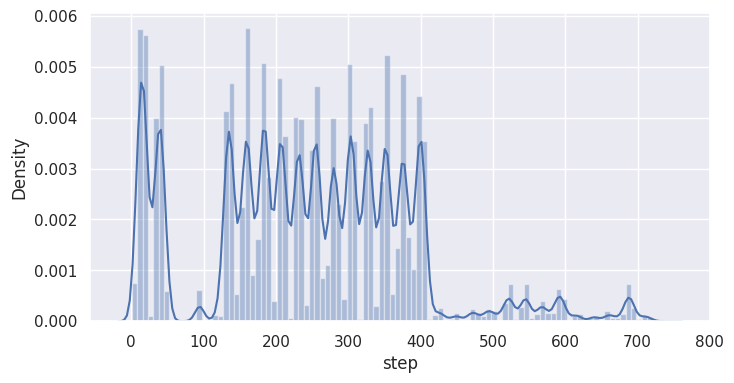

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['step'],bins=100)

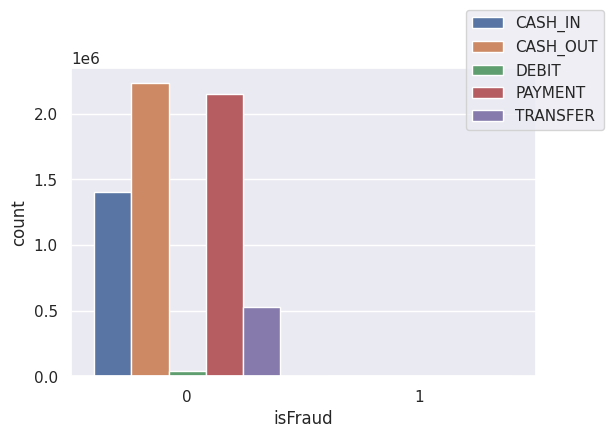

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud',data=df,hue='type')
plt.legend(loc=[0.85,0.8])

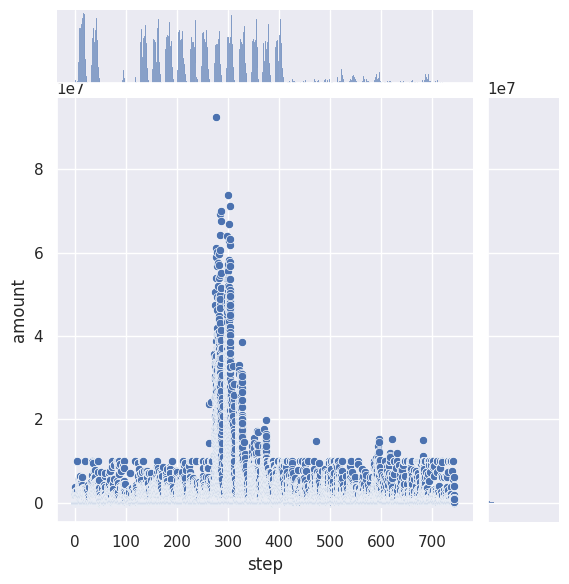

In [ ]:
sns.jointplot(x='step',y='amount',data=df)

The above graph indicates that a step value of approx. 300 corresponds to the maximum amount transfered to a recipient

# To find number of fraud transaction in each type of transaction:

In [ ]:
fraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
fraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
frauddebit = df.loc[(df.isFraud == 1) & (df.type == 'DEBIT')]
fraudCashin = df.loc[(df.isFraud == 1) & (df.type == 'CASH_IN')]
fraudpayment= df.loc[(df.isFraud==1) & (df.type=='PAYMENT') ]
print("fraudTransfer:" ,len(fraudTransfer), "fraudCashout=" ,len (fraudCashout) , "frauddebit=" , len (frauddebit) ,'fraudCashin =', len (fraudCashin) , "fraudpayment=" , len (fraudpayment))
#print("fraudTransfer=" fraudTransfer + "fraudCashout=" fraudCashout +"frauddebit=" frauddebit +'fraudCashin ='fraudCashin + "fraudpayment=" fraudpayment)


fraudTransfer: 4097 fraudCashout= 4116 frauddebit= 0 fraudCashin = 0 fraudpayment= 0


Since fraud is detected in transfer and cashout type of transactions.

# The total amount associated with the same categories

In [ ]:
print("FraudTransfer:",fraudTransfer["amount"].sum())
print("FraudCashout:", fraudCashout["amount"].sum())

FraudTransfer: 6067213184.01
FraudCashout: 5989202243.83


In [ ]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

# To find type of transaction for which isFlaggedFraud is set

In [ ]:
(df.loc[df ["isFlaggedFraud"]==1].type).drop_duplicates()

2736446    TRANSFER
Name: type, dtype: category
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

# The minimum and maximum transactions done when isFlaggedFraud is set

In [ ]:
print('Minimum Transaction :', df.loc[df.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.max())

Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


In [ ]:
fraud_a= df[(df.type=='TRANSFER') | (df.type=='CASH_OUT')]

# Defining Features


In [ ]:
fraud_a['fraudBalanceOrig'] = fraud_a.newbalanceOrig + fraud_a.amount - fraud_a.oldbalanceOrg
fraud_a['fraudBalanceDest'] = fraud_a.oldbalanceDest + fraud_a.amount - fraud_a.newbalanceDest

<ipython-input-35-0eccbb47d6ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_a['fraudBalanceOrig'] = fraud_a.newbalanceOrig + fraud_a.amount - fraud_a.oldbalanceOrg
<ipython-input-35-0eccbb47d6ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_a['fraudBalanceDest'] = fraud_a.oldbalanceDest + fraud_a.amount - fraud_a.newbalanceDest


In [ ]:
fraud_a=fraud_a.drop(['nameDest','nameOrig'], axis = 1)
fraud_a.shape


(2770409, 11)

In [ ]:
fraud_a['type'].replace('TRANSFER', 0, inplace = True)
fraud_a['type'].replace('CASH_OUT', 1, inplace = True)

In [ ]:
fraud_a.isnull().sum()

step                0
type                0
amount              0
oldbalanceOrg       0
newbalanceOrig      0
oldbalanceDest      0
newbalanceDest      0
isFraud             0
isFlaggedFraud      0
fraudBalanceOrig    0
fraudBalanceDest    0
dtype: int64

<ipython-input-39-c5c3d5466763>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_a['fraudBalanceOrig'], color = 'red')
<ipython-input-39-c5c3d5466763>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_a['fraudBalanceDest'], color = 'red')


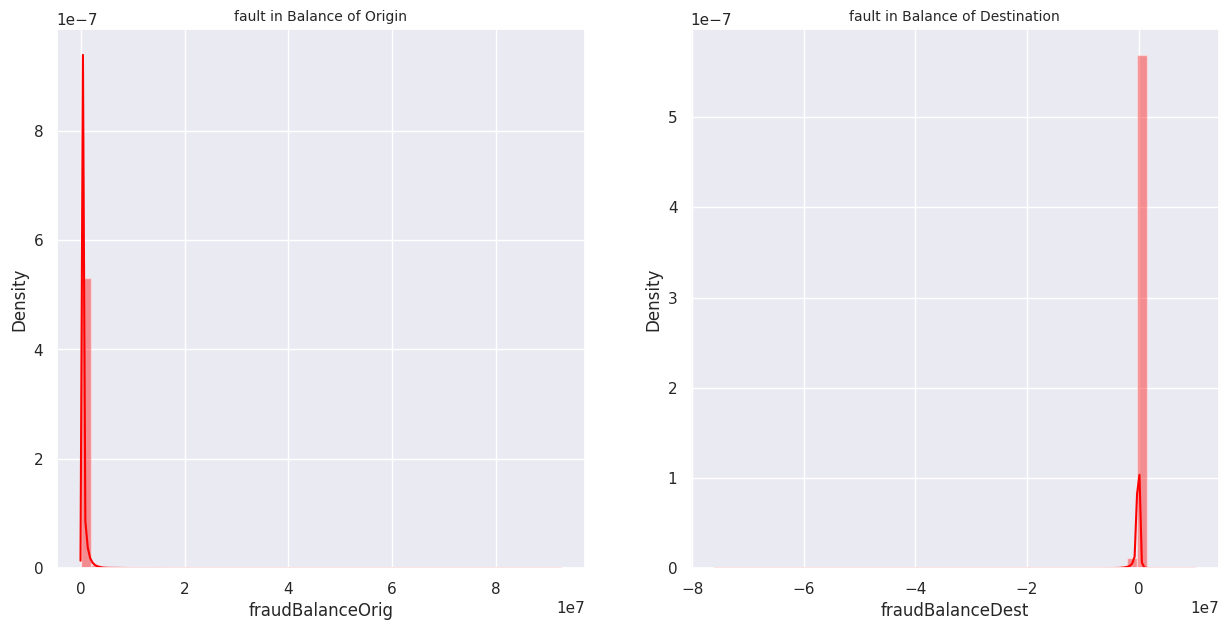

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(121)
sns.distplot(fraud_a['fraudBalanceOrig'], color = 'red')
plt.title('fault in Balance of Origin', fontsize = 10)

plt.subplot(122)
sns.distplot(fraud_a['fraudBalanceDest'], color = 'red')
plt.title('fault in Balance of Destination', fontsize = 10)

plt.show()

### above figure shows faults in amount of origin and destination account

In [ ]:
fraud_a['isFraud'].value_counts()
     

0    2762196
1       8213
Name: isFraud, dtype: int64

In [ ]:
fraud_b=fraud_a['isFraud']
fraud_a = fraud_a.drop(['isFraud'], axis = 1)

In [ ]:
fraud_a.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,fraudBalanceOrig,fraudBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [ ]:
fraud_b.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: category
Categories (2, int64): [0, 1]

## OVER-SAMPLING

In [ ]:
from imblearn.over_sampling import SMOTE

a_resample, b_resample = SMOTE().fit_resample(fraud_a, fraud_b.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of fraud_a: ", a_resample.shape)
print("Shape of fraud_b:", b_resample.shape)

Shape of fraud_a:  (5524392, 10)
Shape of fraud_b: (5524392,)


In [ ]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a_resample, b_resample, test_size = 0.2, random_state = 42)

# checking the new shapes
print("Shape of x_train: ", a_train.shape)
print("Shape of x_test: ", a_test.shape)
print("Shape of y_train: ", b_train.shape)
print("Shape of y_test: ", b_test.shape)

Shape of x_train:  (4419513, 10)
Shape of x_test:  (1104879, 10)
Shape of y_train:  (4419513,)
Shape of y_test:  (1104879,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

## Modelling using Xg-Boost Model

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(a_train, b_train)

b_pred = model.predict(a_test)

score = average_precision_score(b_test, b_pred)
print("The Area under Precision Recall Curve Score is", score)

The Area under Precision Recall Curve Score is 0.9996945292513152


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(b_test, b_pred)

print(cm)

[[551803    103]
 [   132 552841]]
